# Fourier transforms of sound data


<!--The Discrete Fourier Transform (DFT) is given by:

$$c_k = \sum_{n=0}^{N-1}y_n e^{-i\frac{2\pi kn}{N}}$$

for $0 < k \leq N/2$. -->

The Fourier transform allows us to look at a periodic function in time to find the frequency composition of our function. For example, the figure below shows three different sinusoidal functions. They are distinguished by their frequency ($\omega$ is $\pi/2$ in red, $\pi$ in green, and $2\pi$ in blue).
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/sinwv.png?raw=True">
The Fourier Transform results in a frequency spectrum as shown below. In this graph we see the three frequencies color coded as above. Each sinusoidal wave is composed of a single frequency.
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/FFT.png?raw=True">

If the three sinusoidal waves were summed together to create a superposition, they would have a form like the following.

$$f(t) = \sin\left(\frac{\pi}{2}t\right) + \sin\left(\pi t\right) + \sin\left(2\pi t\right)$$

And a graph of this function looks like the following.
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/sinsum.png?raw=True">
The Fourier Transform of $f(t)$ results in a frequency spectrum as shown below.
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/FFTsum.png?raw=True">
where we see the superposition is composed of three pure frequencies.

## The Discrete Fourier Transform (DFT)
Digital sound data is discrete. Data is taken at a rate given by the *sampling rate* of your recording device or application. Therefore, the discrete Fourier transform can be applied to calculate the frequency composition of an audio sample. In this activity, we will load in a text file of audio as an array $y_n$ and find what frequencies (or notes) are in the sound.

$$\large{c_k = \sum_{n=0}^{N-1}y_n e^{-i\frac{2\pi kn}{N}}}$$

$$c_k = \sum_{n=0}^{N-1}y_n \left[\cos\left(\frac{2\pi kn}{N}\right)-i\sin\left(\frac{2\pi kn}{N}\right)\right]$$

for $0 < k \leq N/2$, where $N$ is the number of samples in your array. The value of $k/N$ describes a frequency $f$, and we assume we are unable to detect frequencies greater than $N/2$. This is called the Nyquist Limit, and is graphically represented below by a sine wave sampled twice for each period. If sampled at a lower rate, we would have no knowledge whether that frequency is in the signal.
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/Nyquist.png?raw=True">
$n$ is the discrete point number in our sound data array and ranges $0\leq n< N$.

For now, we won't worry ourselves with the dissecting this mathematics any further.

In [1]:
%matplotlib inline
# imports here
from IPython.display import Audio # plays audio in a Jupyter notebook
import numpy as np
from numpy import sin, cos, exp, log, pi
import matplotlib.pyplot as plt
#resize graphs so they are big
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

* Generate an array of simulated data with a known frequency, and use you function to calcluate the coefficients $c_k$. A pure tone at a frequency $f$ is given by $y = \sin{2\pi ft}$. We can hear frequencies of about $150 - 15000$ Hz. ***Note: make sure you are sampling enough points to fully represent your function.***
    * Set the frequency of your sine wave.
    * Set `t_max` to 100 periods.
    * Set `N` such that $N\ge t_{max}*frequency * 10$. This is related to the discussion above about the Nyquist limit.
        * Explain what would happen if $N \le t_{max}*frequency*2$.
    * Fill in the equation for the sine wave.


* Play your simulated sound using `Audio` from `IPython.display` and see if the tone matches that of the frequency that you found (You can check here! http://www.szynalski.com/tone-generator/).


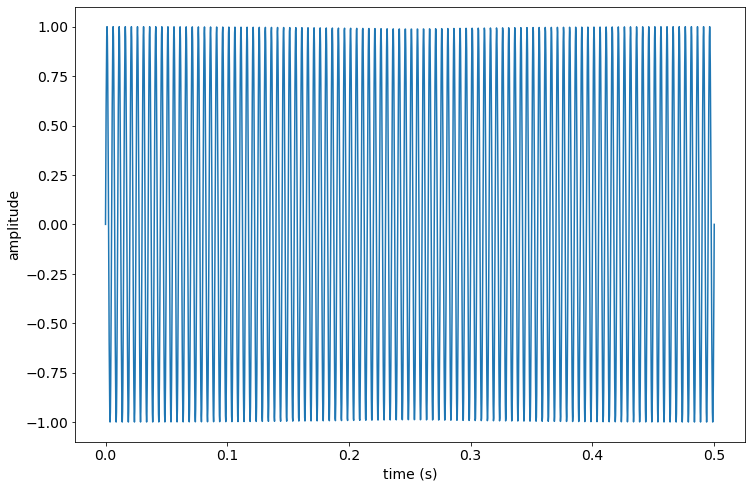

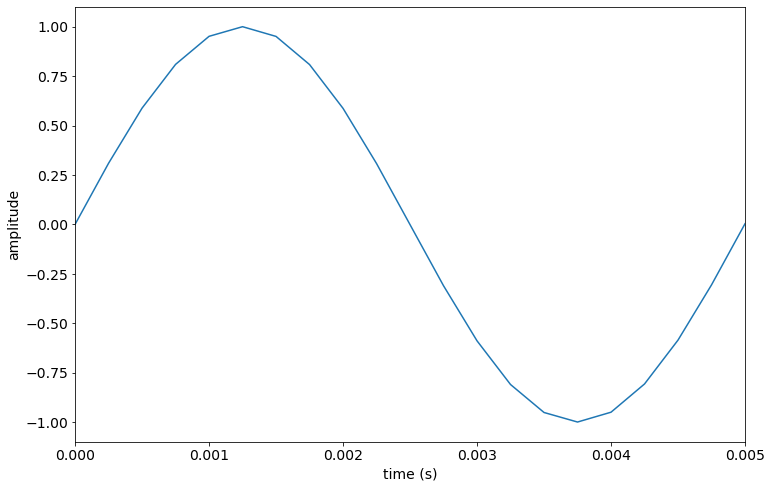

In [14]:
# generate data:
frequency = 200 #Frequency of wave
t_max = 0.5 #Maximum length of time (sampling length)
N = 2000 #Number of samples
t = np.linspace(0,t_max,N) #time array

omega = 2* pi * frequency #angular frequency
y = sin(omega*t) #sin(wt)

#Full Plot
plt.plot(t,y)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

#Zoomed into one period Plot
plt.plot(t,y)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(0,1/frequency)
plt.show()

# play sound and verify it is at correct frequency:
Audio(y, rate=len(t)/t_max, autoplay=True)


**Create a `dft(y)` function that takes in an array of discrete points and returns a coefficient array.**
* Get the number of samples `Nsamp = len(y)`.
* Create a `c` array filled with zeros. It will have coefficients for `N/2+1` different frequencies and is complex.
    * `c = np.zeros(N//2+1, complex)`
* Loop over `k` values up to `N/2+1`.
* Loop over the number of samples in the wave.
    * Calculate the coefficients by summing into the value of `c[k]` the current wave point times the complex exponential function.
    * `c[k] += y[n]*exp(-2j*pi*k*n/N)`
* Plot $c_k$ vs. $k$
*  If we know the sample rate of the data, $f_s$, then we can convert the coefficient to a frequency: $f_k = \frac{k f_s}{N}$, where N is the number of samples. For this example, $f_s = \frac{N}{t_{max}}$

* Calculate the frequency for your largest $c_k$ and verify that it matches your input frequency. HINTS:
    * `c` is the amplitude of each frequency.
    * `k` is a variable representing the row in the array of frequency amplitudes.
    * `k` goes from 0 to N/2, and we assume $\frac{N}{2}\frac{1}{t_{max}}$ is the largest frequency we can evaluate.

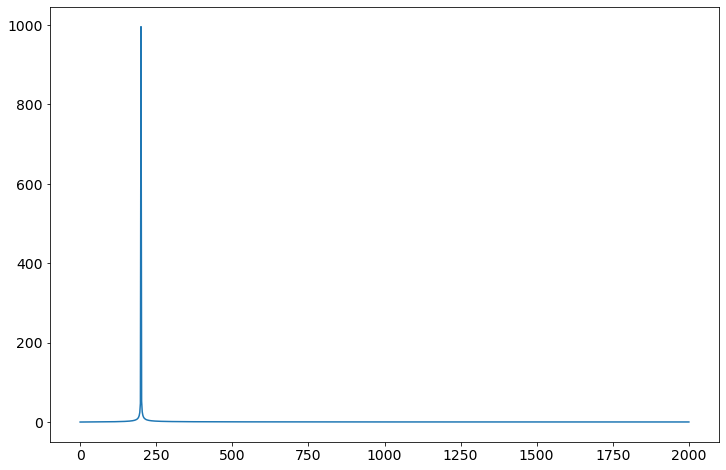

The frequency is 200.0 Hz


In [16]:
# create dft function, use it to plot c_k vs k, and visually determine k of highest peak.
# convert your k to a frequency in Hz and compare to input frequency of simulated signal (they should be the same).
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

c = dft(y)
freq_x = np.linspace(0, N/2/t_max, np.size(c))
plt.plot(freq_x,abs(c))
#plt.xlim(250,300)
plt.show()
k = np.argmax(c) # k of max c(k)
print("The frequency is", k/t_max, "Hz")

### Check your code

* Repeat the "brute force" Fourier Transform above for frequencies 200, 2000, 5000 Hz. Be patient the "brute force" method is slow to calculate.
* When you play the waves as a sound, what do you observe?
* Is the Fourier Transform accurate at finding the frequency? Explain how you know through both graphical inspection and calculation.


## Analyze sound data

It's possible to use a free program called Audacity to record sounds and export them as text. The process is described below. Before recording your own sounds. Proceed through the analysis of recordings supplied (a whistle and a hand clap). You will be using a built-in `numpy` Fourier Transform algorithm, which is much fast than the one you programmed. Feel free to compare your coded FFT with the `numpy` one. To use `numpy`, the following command is used.

```Python
np.fft.rfft(sound_array)
```

*NOTE: If you record your own sounds, you will need to troubleshoot any issues on your own.*

* Use the program Audacity to record two sounds of your choosing, using anything available to you in the room. Feel free to choose any sound you like, for example, the instruments, your voice, or any other sound you can create. Keep in mind that you will be analyzing a *very* short duration of sound.
    * Set the recording parameter "Project Rate (Hz)" to 44100.
    * Record the sound, trying to keep it around 1-2 seconds.
    * Crop the recording by selecting regions without sound and typing the "Delete" key.
    * In the "Tracks" menu select "Mix" and then "Mix Stereo Down to Mono".
    * In the "Tools" menu, select "Sample Data Export..." with the following settings.
        * Limit output to first: $44100 \times t_{max}$.
        * Measurement scale: Linear
        * Export data to: Create a file in the folder "sounds"
        * Channel layout for stereo: L-R on Same Line
* Load into Jupyter and check that the chosen portion plays your expected sound.
* Calculate the fft, make the $c_k$ plot, and calculate the maximum amplitude frequency.
* Qualitatively compare the frequency composition and the sound.

### Sound #1 - Whistle

The first sound is a whistle. The process is

1. Load the sound.
2. Set a sample rate.
3. Find the number of samples.
4. Create a time axis.
5. Plot the sound.

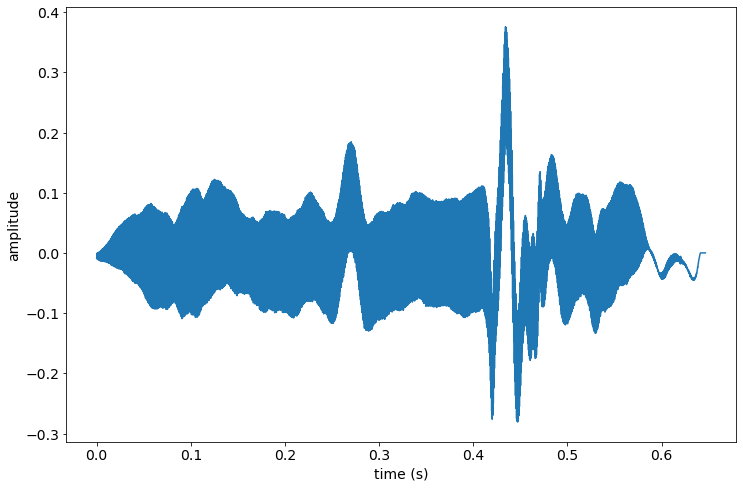

In [43]:
whistle = np.loadtxt("./sounds/whistle.txt",float)
#y_sample = y[0:10000] #If your sound is too long, you can sample a small portion
my_rate = 44100
N = whistle.size
t_max = N/my_rate
t_ax = np.linspace(0, N/my_rate, N)
plt.plot(t_ax, whistle) #Use y_sample if you shorten it
plt.xlabel('time (s)')
plt.ylabel('amplitude')
#plt.xlim(0,500)
#xlim(0,400)
plt.show()

Audio(whistle,rate=44100, autoplay=True)

#### Analyze the Whistle

To analyze the sound, we will use the `numpy` FFT. `rfft` returns the real portion of the FFT. We need to create a frequency array that is based on the sample rate `my_rate` and number of samples. The FFT will only attempt to calculate coefficients up to `my_rate/2`, and these frequency coefficients will be in an array that is `N/2` long. Actually, `N` could be odd. So, we need to mod `N` and add 1.

14255 14255


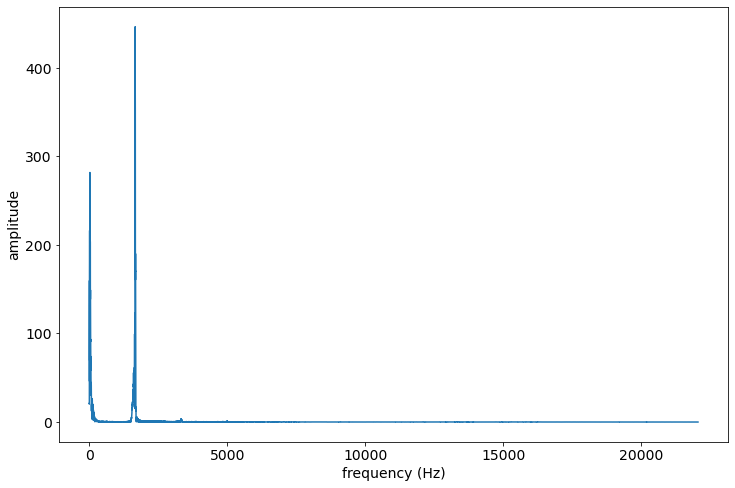

The frequency is 1664.5011926476777 Hz


In [41]:
c_whistle = np.fft.rfft(whistle)
f_whistle = np.linspace(0, my_rate/2, N//2+1)
print(c_whistle.size, N//2+1)
plt.plot(f_whistle, abs(c_whistle))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
#plt.xlim(1200,1800)
plt.show()
k = np.argmax(abs(c_whistle)) # k of max c(k)
print("The frequency is", k/t_max, "Hz")

### Sound #2 - Clap

The second sound is a hand clap.

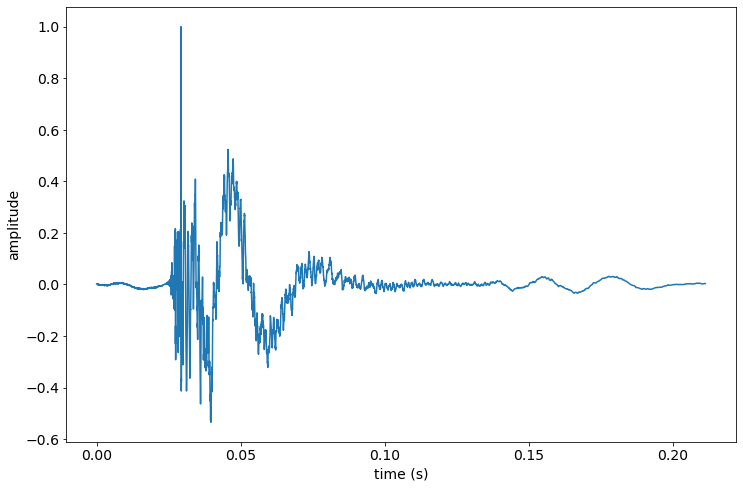

In [47]:
clap = np.loadtxt("./sounds/clap.txt",float)
N_clap = clap.size
t_max_clap = N_clap/my_rate
t_clap = np.linspace(0, t_max_clap, N_clap)
plt.plot(t_clap, clap)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
Audio(clap,rate=44100, autoplay=True)

It may be helpful with the clap to plot the FFT on a semi-log plot where the y-axis is log scale.

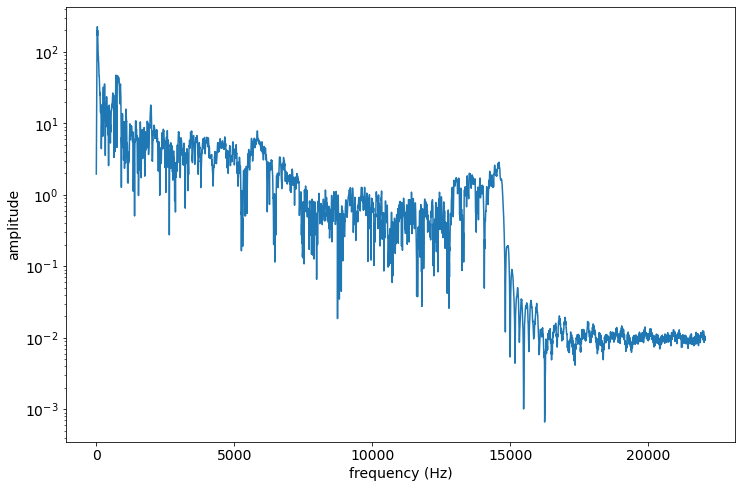

The frequency is 37.84595580347565 Hz


In [52]:
c_clap = np.fft.rfft(clap)
f_clap = np.linspace(0, my_rate/2, N_clap//2+1)

#plt.plot(f_clap, abs(c_clap))
plt.semilogy(f_clap, abs(c_clap))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
#plt.xlim(0.1,3000)
#plt.ylim(0.1, 300)
plt.show()

k = np.argmax(abs(c_clap)) # k of max c(k)
print("The frequency is", k/t_max_clap, "Hz")

## There is more!
There are other sounds in the sounds folder (ahhh, ehhh, hello). When you are finished with all of the sounds, write a summarizing paragraph about what you found for the different sounds' frequency spectra. Explain why some sounds have a more complicated spectrum while others are simpler.

### Ahh

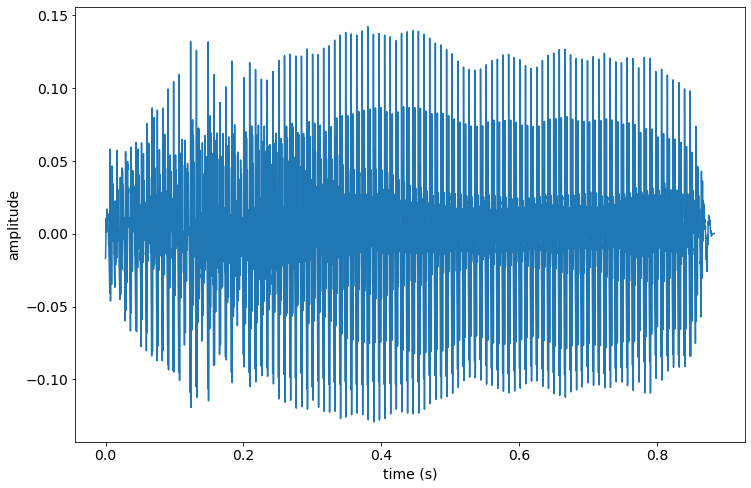

In [53]:
ahh = np.loadtxt("./sounds/ahhh.txt",float)
N_ahh = ahh.size
my_rate = 44100
t_max_ahh = N_ahh/my_rate
t_ahh = np.linspace(0, t_max_ahh, N_ahh)
plt.plot(t_ahh, ahh)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
Audio(ahh,rate=44100, autoplay=True)

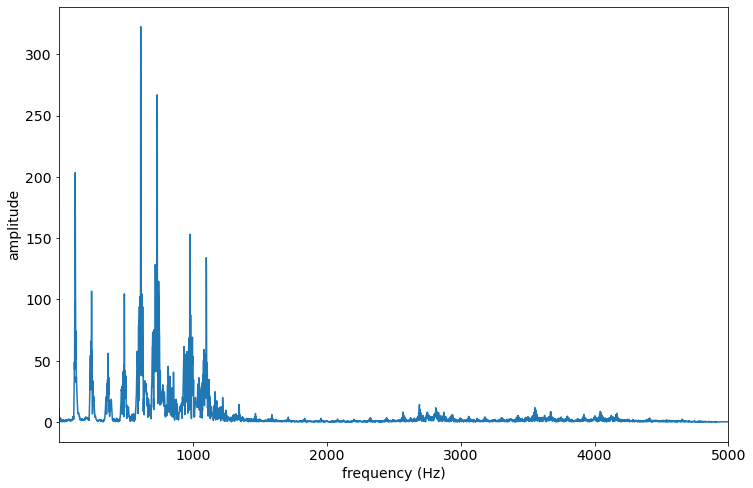

The frequency is 611.6976188641443 Hz


In [55]:
c_ahh = np.fft.rfft(ahh)
f_ahh = np.linspace(0, my_rate/2, N_ahh//2+1)

plt.plot(f_ahh, abs(c_ahh))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0.1,5000)
#plt.ylim(0.1, 300)
plt.show()

k = np.argmax(abs(c_ahh)) # k of max c(k)
print("The frequency is", k/t_max_ahh, "Hz")

### ehh

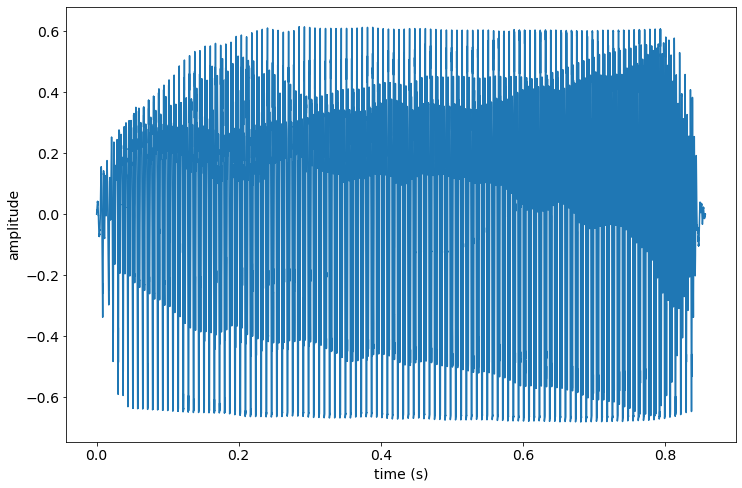

In [56]:
ehh = np.loadtxt("./sounds/ehhh.txt",float)
N_ehh = ehh.size
my_rate = 44100
t_max_ehh = N_ehh/my_rate
t_ehh = np.linspace(0, t_max_ehh, N_ehh)
plt.plot(t_ehh, ehh)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
Audio(ehh,rate=44100, autoplay=True)

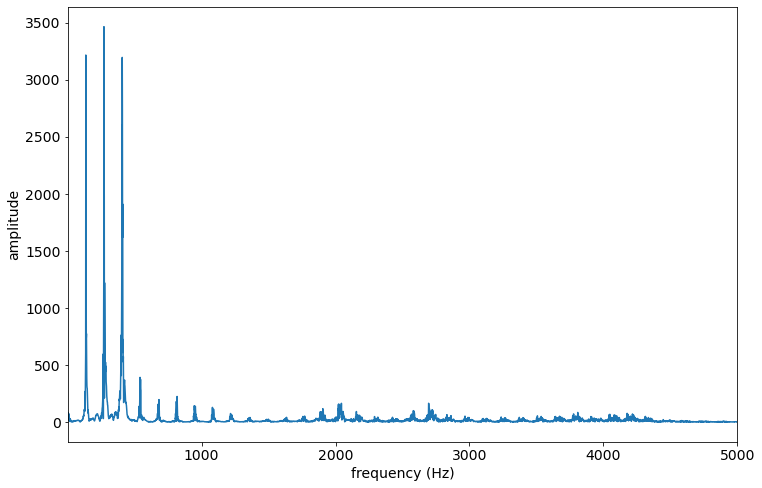

The frequency is 270.7956169604574 Hz


In [58]:
c_ehh = np.fft.rfft(ehh)
f_ehh = np.linspace(0, my_rate/2, N_ehh//2+1)

plt.plot(f_ehh, abs(c_ehh))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0.1,5000)
#plt.ylim(0.1, 300)
plt.show()

k = np.argmax(abs(c_ehh)) # k of max c(k)
print("The frequency is", k/t_max_ehh, "Hz")

### hello

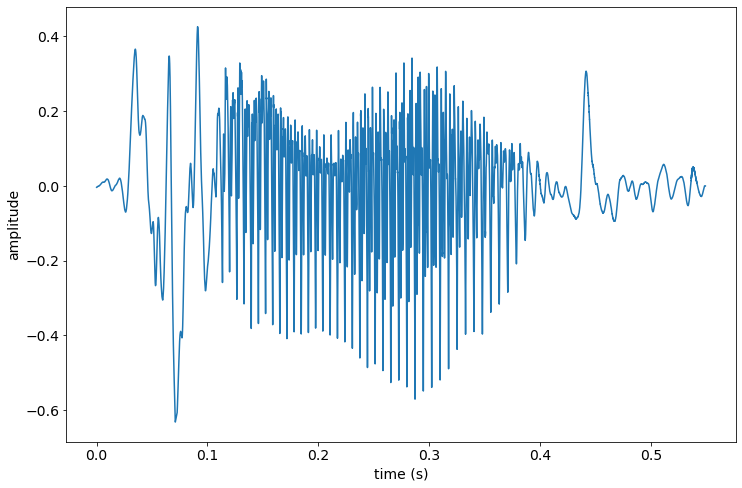

In [59]:
hello = np.loadtxt("./sounds/hello.txt",float)
N_hello = hello.size
my_rate = 44100
t_max_hello = N_hello/my_rate
t_hello = np.linspace(0, t_max_hello, N_hello)
plt.plot(t_hello, hello)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
Audio(hello,rate=44100, autoplay=True)

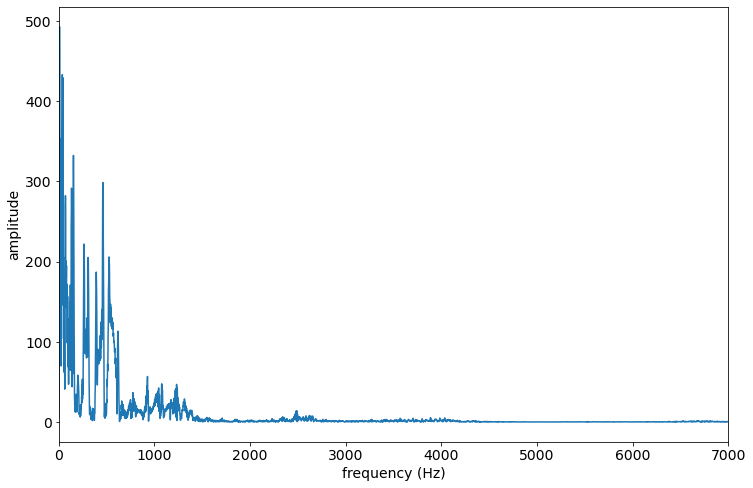

The frequency is 7.284139241029029 Hz


In [62]:
c_hello = np.fft.rfft(hello)
f_hello = np.linspace(0, my_rate/2, N_hello//2+1)

plt.plot(f_hello, abs(c_hello))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,7000)
#plt.ylim(0.1, 300)
plt.show()

k = np.argmax(abs(c_hello)) # k of max c(k)
print("The frequency is", k/t_max_hello, "Hz")